In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ecom=pd.read_csv('Products_ratings_reviews.csv')
ecom

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,14033,Women Off White Flats Sandal,NaN,Women,Flipkart,699,1235,153,NaN,323,155,62,NaN,1
5240,297,Slip On For Men (Tan),3.9,Men,Flipkart,1993,329,56,350.0,37,60,5,37.0,0
5241,18733,Women Grey Heels Sandal,3.8,Women,Flipkart,999,1280,135,574.0,290,172,94,150.0,0
5242,6162,Womens Casual Comfort Stylish Black High Heel ...,3.9,Women,Flipkart,499,4867,574,2384.0,974,648,328,533.0,0


# Data Cleaning

In [3]:
ecom['maincateg']=ecom['maincateg'].fillna('not specified')

In [4]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5244 non-null   int64  
 1   title       5244 non-null   object 
 2   Rating      5041 non-null   float64
 3   maincateg   5244 non-null   object 
 4   platform    5244 non-null   object 
 5   actprice1   5244 non-null   int64  
 6   norating1   5244 non-null   int64  
 7   noreviews1  5244 non-null   int64  
 8   star_5f     5176 non-null   float64
 9   star_4f     5244 non-null   int64  
 10  star_3f     5244 non-null   int64  
 11  star_2f     5244 non-null   int64  
 12  star_1f     5058 non-null   float64
 13  fulfilled1  5244 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 573.7+ KB


In [5]:
mean_rating=ecom['Rating'].mean()
mean_rating

4.011089069629042

In [6]:
ecom['Rating']=ecom['Rating'].fillna(mean_rating)

In [7]:
mean_5f=ecom['star_5f'].mean()
ecom['star_5f']=ecom['star_5f'].fillna(mean_5f)

In [8]:
mean_1f=ecom['star_1f'].mean()
ecom['star_1f']=ecom['star_1f'].fillna(mean_1f)

In [9]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5244 non-null   int64  
 1   title       5244 non-null   object 
 2   Rating      5244 non-null   float64
 3   maincateg   5244 non-null   object 
 4   platform    5244 non-null   object 
 5   actprice1   5244 non-null   int64  
 6   norating1   5244 non-null   int64  
 7   noreviews1  5244 non-null   int64  
 8   star_5f     5244 non-null   float64
 9   star_4f     5244 non-null   int64  
 10  star_3f     5244 non-null   int64  
 11  star_2f     5244 non-null   int64  
 12  star_1f     5244 non-null   float64
 13  fulfilled1  5244 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 573.7+ KB


#Feature Engineering

In [10]:
ecom['Rating']=ecom['Rating'].round(1)

In [11]:
ecom['good_rate_count']=ecom['star_5f']+ecom['star_4f']
ecom['bad_rate_count']=ecom['star_1f']+ecom['star_2f']
ecom.rename(columns={'star_3f':'avg_rate_count'},inplace=True)

In [12]:
ecom.drop(columns=['star_5f','star_4f','star_2f','star_1f'],inplace=True)

In [13]:
ecom['good_rate_count']=ecom['good_rate_count'].astype('int64')

In [14]:
ecom['bad_rate_count']=ecom['bad_rate_count'].astype('int64')

In [15]:
ecom['overall_rating']=pd.cut(ecom['Rating'],bins=[0,2.9,3.5,5],labels=['poor','average','good'])
# Ratings 0-2.9 --> poor   2.9-3.5 --> average   3.5> --> good

In [16]:
ecom.rename(columns={'title':'pname','actprice1':'act_price','norating1':'no_rating','noreviews1':'no_review','fulfilled1':'fulfilled'},inplace=True)

In [17]:
ecom

,id,pname,Rating,maincateg,platform,act_price,no_rating,no_review,avg_rate_count,fulfilled,good_rate_count,bad_rate_count,overall_rating
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,3457,1,18533,5938,good
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,397,1,2115,503,good
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,71,1,299,79,good
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,49,1,192,49,good
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,293,0,1679,451,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,14033,Women Off White Flats Sandal,4.0,Women,Flipkart,699,1235,153,155,1,1880,332,good
5240,297,Slip On For Men (Tan),3.9,Men,Flipkart,1993,329,56,60,0,387,42,good
5241,18733,Women Grey Heels Sandal,3.8,Women,Flipkart,999,1280,135,172,0,864,244,good
5242,6162,Womens Casual Comfort Stylish Black High Heel ...,3.9,Women,Flipkart,499,4867,574,648,0,3358,861,good


In [18]:
new_ord=ecom.columns[[0,1,3,4,5,2,12,6,7,8,10,11,9]]
ecom=ecom[new_ord]

In [19]:
ecom

,id,pname,maincateg,platform,act_price,Rating,overall_rating,no_rating,no_review,avg_rate_count,good_rate_count,bad_rate_count,fulfilled
0,2242,Casuals For Men (Blue),Men,Flipkart,999,3.8,good,27928,3543,3457,18533,5938,1
1,20532,Women Black Flats Sandal,Women,Flipkart,499,3.9,good,3015,404,397,2115,503,1
2,10648,Women Gold Wedges Sandal,Women,Flipkart,999,3.9,good,449,52,71,299,79,1
3,20677,Men's Height Increasing High Heel Formal Party...,Men,Flipkart,2999,3.9,good,290,40,49,192,49,1
4,12593,Loafers For Men (Tan),Men,Flipkart,999,3.9,good,2423,326,293,1679,451,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,14033,Women Off White Flats Sandal,Women,Flipkart,699,4.0,good,1235,153,155,1880,332,1
5240,297,Slip On For Men (Tan),Men,Flipkart,1993,3.9,good,329,56,60,387,42,0
5241,18733,Women Grey Heels Sandal,Women,Flipkart,999,3.8,good,1280,135,172,864,244,0
5242,6162,Womens Casual Comfort Stylish Black High Heel ...,Women,Flipkart,499,3.9,good,4867,574,648,3358,861,0


#Fulfilled-1 ---> Indicates that the product is fulfilled by the seller or the platform itself. The seller or platform manages customer service, shipping,  returns, and refunds, often resulting in better customer experience. And leads to more customer satisfaction


#Fulfilled-0 --> Indicates that the product is fulfilled by a third-party service provider. It allows sellers to extend their reach without managing their own logistics.The quality and speed of fulfillment might vary depending on the third-party service provider.

In [20]:
ecom['pname'].value_counts()

,count
pname,
Flip Flops,143
Slippers,129
Slides,126
Women Black Heels Sandal,106
Women Black Wedges Sandal,76
...,...
Go Run 600-Spectra Walking Shoes For Women (Grey),1
Lace Up For Women (Black),1
Beige Slip On Jutis For Women (Beige),1


In [21]:
ecom['platform'].unique()

array(['Flipkart', 'Amazon'], dtype=object)

#Number of products in each platform:-

In [22]:
ecom.groupby('platform')['platform'].value_counts()

,count
platform,
Amazon,104
Flipkart,5140


Text(0.5, 1.0, 'Average price of each platform')

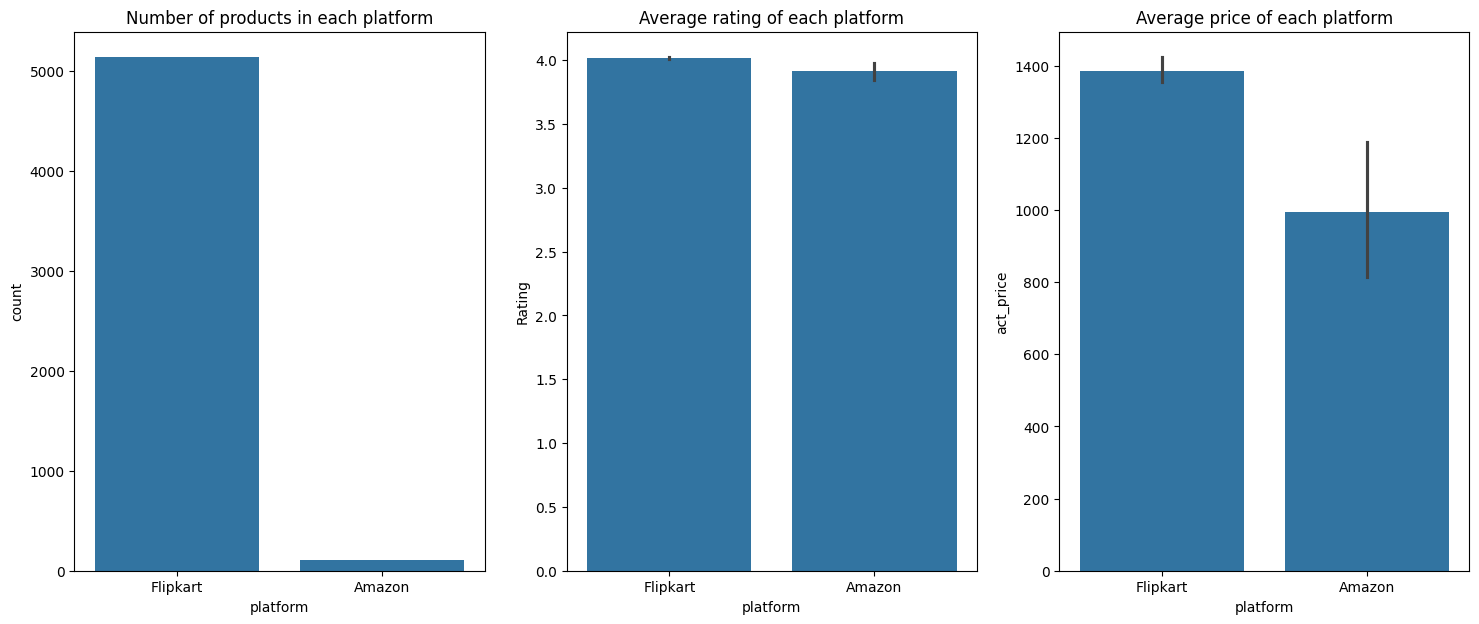

In [23]:
fig,axes=plt.subplots(1,3,figsize=(18,7))
sns.countplot(data=ecom,x='platform',ax=axes[0])
axes[0].set_title('Number of products in each platform')
sns.barplot(data=ecom,x='platform',y='Rating',ax=axes[1])
axes[1].set_title('Average rating of each platform')
sns.barplot(data=ecom,x='platform',y='act_price',ax=axes[2])
axes[2].set_title('Average price of each platform')
# plt.grid()

1. Since flipkart is an indian platform, they might have known about taste and preferences of indian people more than Amazon. That maybe the reason for more count in flipkart than amazon.
2. Or listing of sold products rules might vary between 2 platform, which mean amazon may follow strict rule for listing the sold products than flipkart that's why aman showing very less count.
    * However in this dataset we have high number flipkart sold products only.
    * eventhough count differs, average ratings of both almost similar and average price of all products in each platform have certain difference in which flipkart ahead of amazon.    



#Correlation between the numeric columns:-

<Axes: >

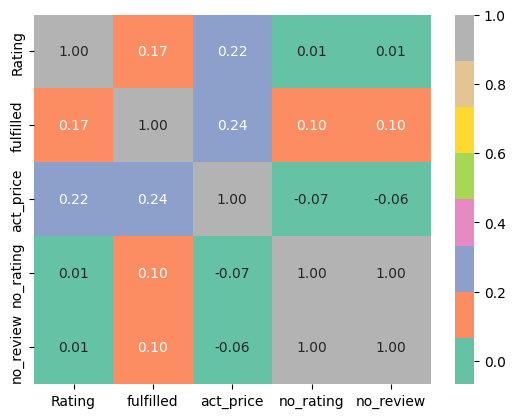

In [24]:
d=ecom[['Rating','fulfilled','act_price','no_rating','no_review']].corr(numeric_only=True)
sns.heatmap(d,fmt='.2f',annot=True,cmap='Set2')

* No_rating and No_reviews columns, both are dependent on each other. They have linear relationship among themselves.
* All others have weak relationships among them

In [25]:
pd.pivot_table(data=ecom,values=['pname','maincateg'],aggfunc='count',index='platform')

,maincateg,pname
platform,,
Amazon,104,104
Flipkart,5140,5140


Text(0.5, 1.0, 'Average price of each platform')

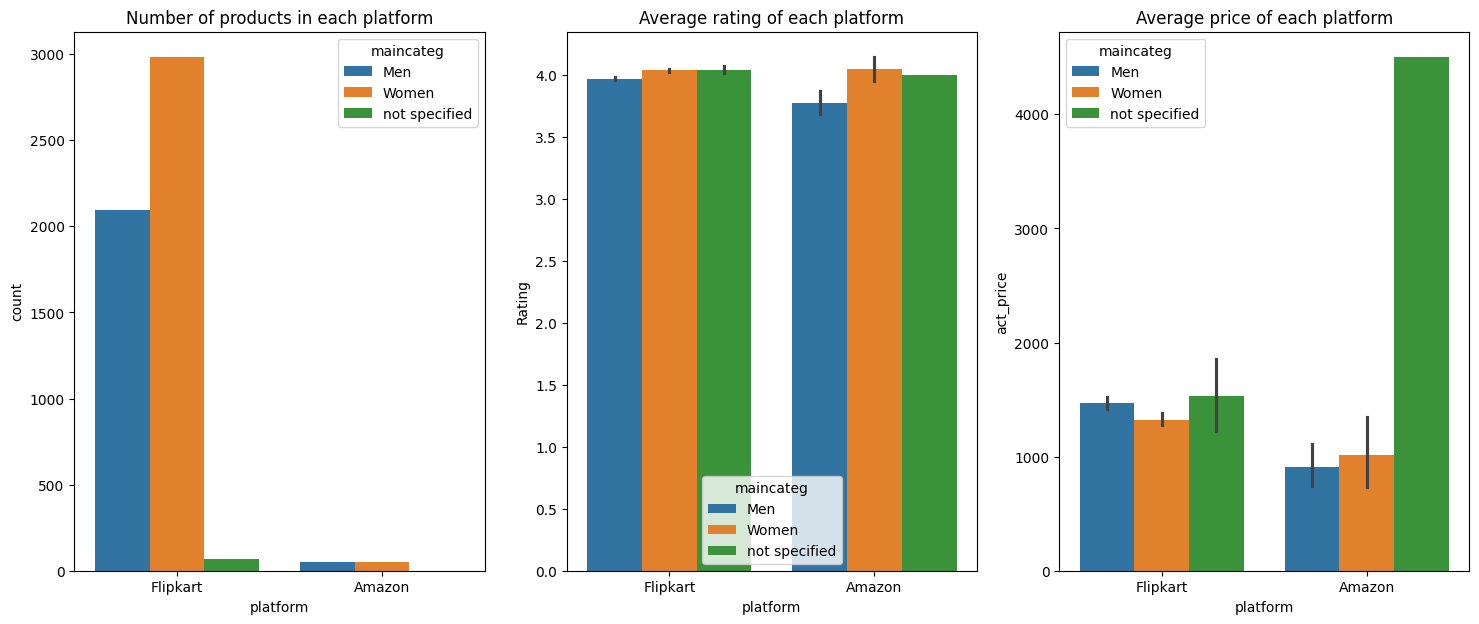

In [26]:
fig,axes=plt.subplots(1,3,figsize=(18,7))
sns.countplot(data=ecom,x='platform',hue='maincateg',ax=axes[0])
axes[0].set_title('Number of products in each platform')
sns.barplot(data=ecom,x='platform',y='Rating',hue='maincateg',ax=axes[1])
axes[1].set_title('Average rating of each platform')
sns.barplot(data=ecom,x='platform',y='act_price',hue='maincateg',ax=axes[2])
axes[2].set_title('Average price of each platform')
# plt.grid()

1. Average ratngs of mens products very low because of less satisfaction of customers variously in flipkart it is nearer to 4.0.
2. Men customers are not much satisfied with amazon proucts.
3. In 3rd graph cost of non specified is significantly high in Amazon.
     *REASON: Both men and women can use the non specified products, so demand would be high. If demand high cost will ramp up.
     * (Or) the demand or quality of non specified products maybe high in Amazon.
4. Eventhough women products in higher count, average price value is less than men. Which describe women products were cheap/affordable in cost than products of men.

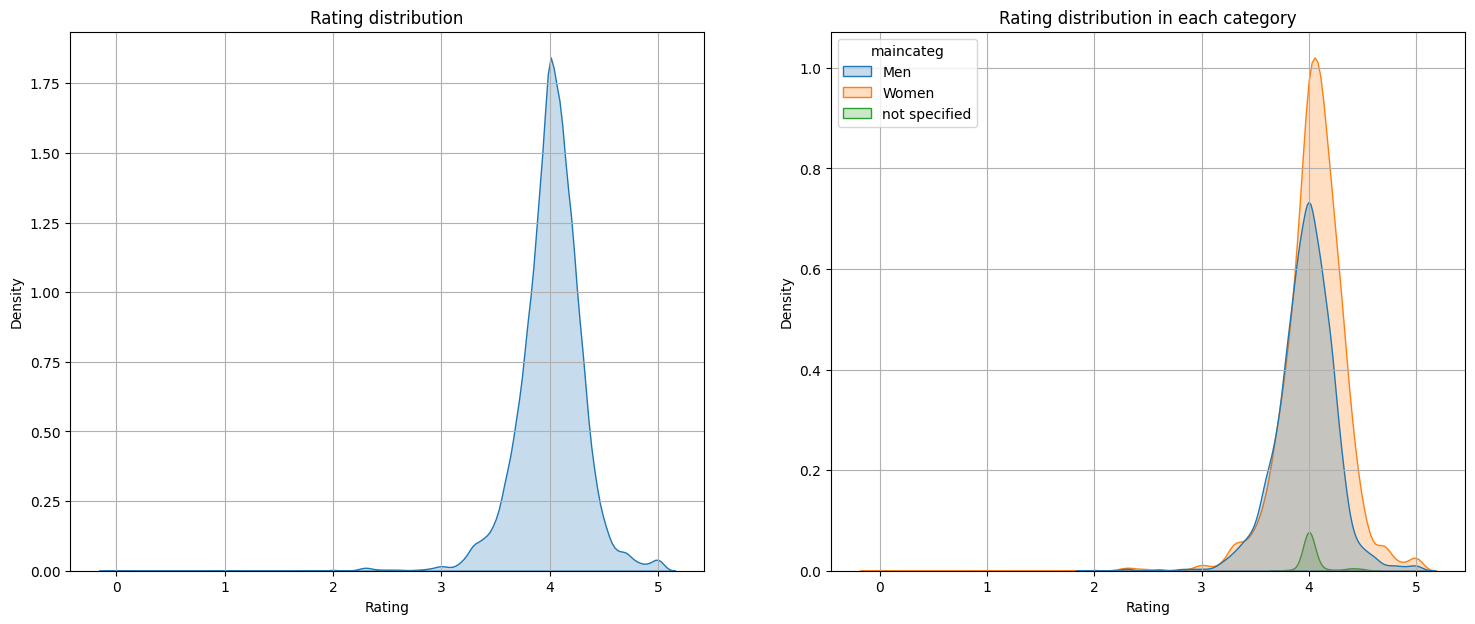

In [27]:
fig,axes=plt.subplots(1,2,figsize=(18,7))
sns.kdeplot(data=ecom,x='Rating',fill=True,ax=axes[0])
axes[0].set_title('Rating distribution')
axes[0].grid()
sns.kdeplot(data=ecom,x='Rating',hue='maincateg',fill=True,ax=axes[1])
axes[1].set_title('Rating distribution in each category')
axes[1].grid()

#GRAPH 1:-:
1. Many of the products got ratings around 3.9-4.0 or 4.1 which all are considered as good ratings, which will be considered as good ratings.
2. Very less number products distribution of ratings only is above 4.2.
#GRAPH 2:-
1. Most of women category products got 4+ ratings while men got 4+ ratings lesser in count.
2. Which mean most of the women products were liked by many people because,maybe the quality and price were good and affordable.
3. Signicantly less number of non specified products only got 4+ star ratings.

#Products which got more bad ratings than good ratings:-

In [28]:
bad_than_good=ecom[ecom['good_rate_count']<ecom['bad_rate_count']]
bad_than_good

,id,pname,maincateg,platform,act_price,Rating,overall_rating,no_rating,no_review,avg_rate_count,good_rate_count,bad_rate_count,fulfilled
23,13985,Denill Women's Sneaker,Women,Amazon,449,3.9,good,563,197,13,16,71,0
44,6052,Derby For Men (Black),Men,Flipkart,4999,2.8,poor,22,1,2,8,12,1
52,16193,crocs Unisex's Ralen Clogs,Women,Amazon,995,4.3,good,1,661,7,10,82,1
99,1,Unistar Men's Boots,Men,Amazon,941,4.2,good,1,1,9,9,79,1
101,4133,Conbird Brown Indian Ethnic Loafers Loafers Fo...,Men,Flipkart,1999,2.6,poor,7,0,1,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,6636,"Earton Comfortable Sneaker, Loafer (Walking) W...",Women,Amazon,630,3.8,good,5,3,0,23,77,1
5156,5628,Women Red Heels Sandal,Women,Flipkart,699,4.0,good,125,20,22,77,279,0
5164,9552,Mojaris Jutis For Men (Black),not specified,Flipkart,499,4.0,good,11,2,0,8,271,0
5188,3575,Ethnic Mule For Women (Pink),Women,Flipkart,699,4.0,good,53,8,7,39,272,0


In [29]:
bad_than_good['pname'].count()

199

1. Totally 199 products received bad ratings(1-2) than good ratings(4-5).
2. This all were hated by most of the people because of maybe quality,not worth for money, damaged, fake product/brand, etc,.. and all.

In [30]:
bad_than_good[bad_than_good['Rating']>4]['pname'].count()

47

1. Even though these products hated by many, still much products among this however managed to get 4 and 4+ ratings.
2. This happened due to maybe average ratings of these might have been higher, so cumulatively the overall ratings maybe ramped up.
3. These and all not affected by bad reviews.

In [48]:
b=ecom['maincateg'].value_counts().sort_index(ascending=True)
b

,count
maincateg,
Men,2145
Women,3032
not specified,67


#Main category wise:-

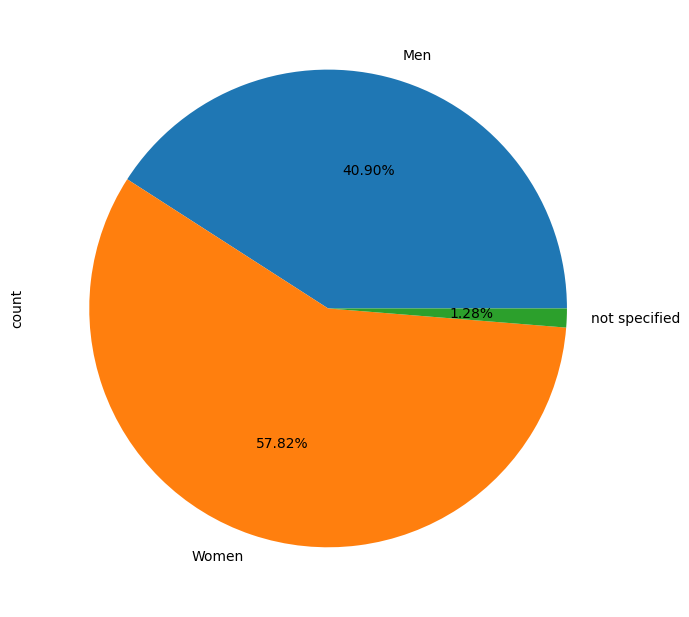

In [49]:
plt.figure(figsize=(7,7))
b.plot(kind='pie',x=b.index,autopct='%.2f%%')
plt.tight_layout()

#Overall Ratings distribution through Pie chart:-

In [31]:
a=ecom['overall_rating'].value_counts().sort_index(ascending=True)
a

,count
overall_rating,
poor,25
average,232
good,4986


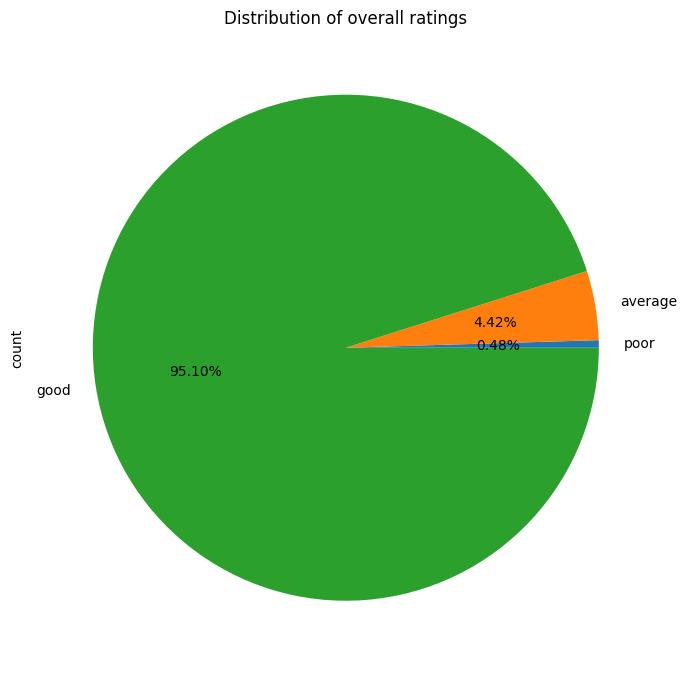

In [32]:
plt.figure(figsize=(7,7))
a.plot(kind='pie',x=a.index,autopct='%.2f%%')
plt.title('Distribution of overall ratings')
plt.tight_layout()

* More than 95% of products got good ratings and 0.48% only got poor ratings others are average which all nearly equal to 3-3.5 ratings

#Distribution of Products cost along with outliers:-

In [33]:
ecom['act_price'].mode()

,act_price
0,999


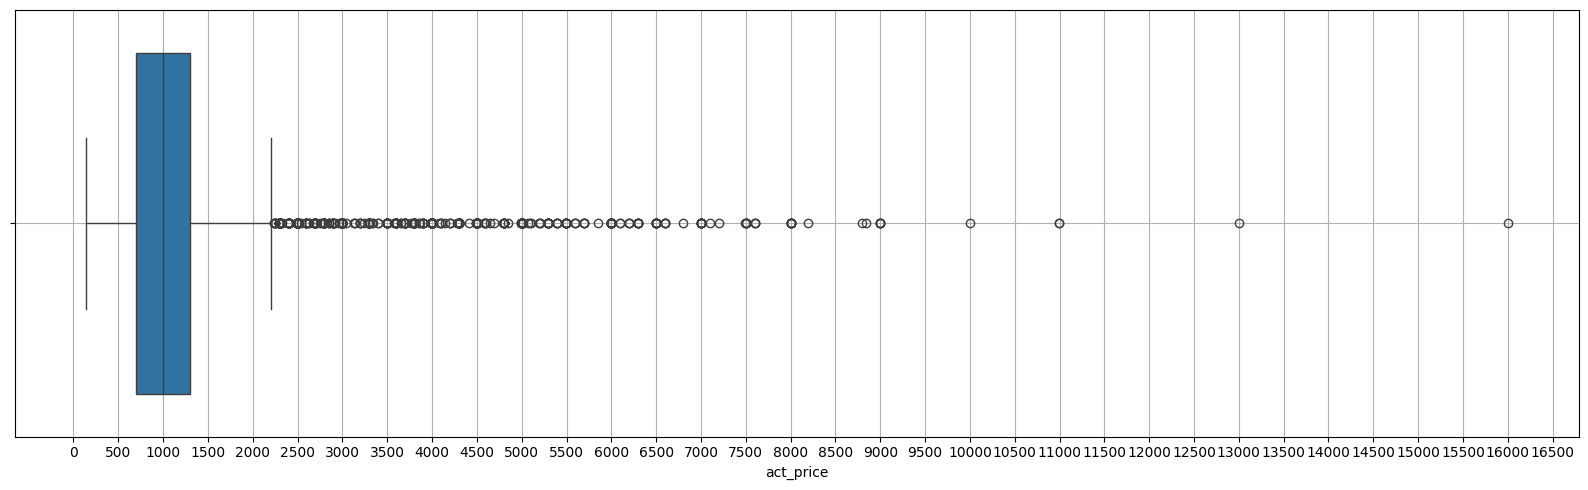

In [34]:
plt.figure(figsize=(16,5))
sns.boxplot(data=ecom,x='act_price')
plt.xticks(np.arange(0,16501,500))
plt.grid()
plt.tight_layout()

* In between 0-2200 cost price of products only sold in higher count rest all are outliers
* Only 4 products cost more than 10000. And all others are less thn that only
* Very less number people only buy costly things even in their small accessories.
* Products which cost 999Rs. were purchased in higher counts.

#Calculation of Quartiles 1,2, and 3

In [35]:
Q1=ecom['act_price'].quantile(0.25)
Q2=ecom['act_price'].median()
Q3=ecom['act_price'].quantile(0.75)
IQR=Q3-Q1
IQR

600.0

In [36]:
Q1

699.0

In [37]:
Q2

999.0

In [38]:
Q3

1299.0

# Relationship between Ratings and Actual prices:-

In [39]:
ecom['Rating'].max()

5.0

In [40]:
ecom['act_price'].max()

15999

<Axes: xlabel='act_price', ylabel='Rating'>

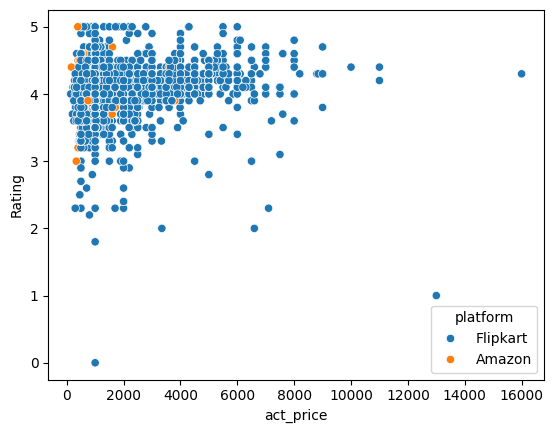

In [41]:
sns.scatterplot(data=ecom,x='act_price',y='Rating',hue='platform')

1. Since there are lot of clusters, it is stronly related. And thre are some outliers too.
  * Products which all costs less than 8000 Rs. were higher in count and ratings wise too. This is because, people prefer less price with more quality which is affordable for middle class & lower middle class families.
  * Very less number people only buy costly things even in their small accessories.

In [42]:
ecom[ecom['act_price']>10000]

,id,pname,maincateg,platform,act_price,Rating,overall_rating,no_rating,no_review,avg_rate_count,good_rate_count,bad_rate_count,fulfilled
3146,11612,GEL-QUANTUM 360 KNIT Running Shoes For Women ...,Women,Flipkart,15999,4.3,good,19,0,1,16,2,1
3317,2869,GT-2000 5 (D) Running Shoes For Women (Blue),Women,Flipkart,10999,4.4,good,90,11,6,79,5,1
3484,3515,Women Orange Sports Sandal,Women,Flipkart,12999,1.0,poor,2,2,0,0,2,1
3680,10477,Hybrid Astro Running Shoes For Men (Black),Men,Flipkart,10999,4.2,good,166,29,11,133,22,1


* Only 4 products costs over 10000 Rs.

Text(0, 0.5, 'Actual Price')

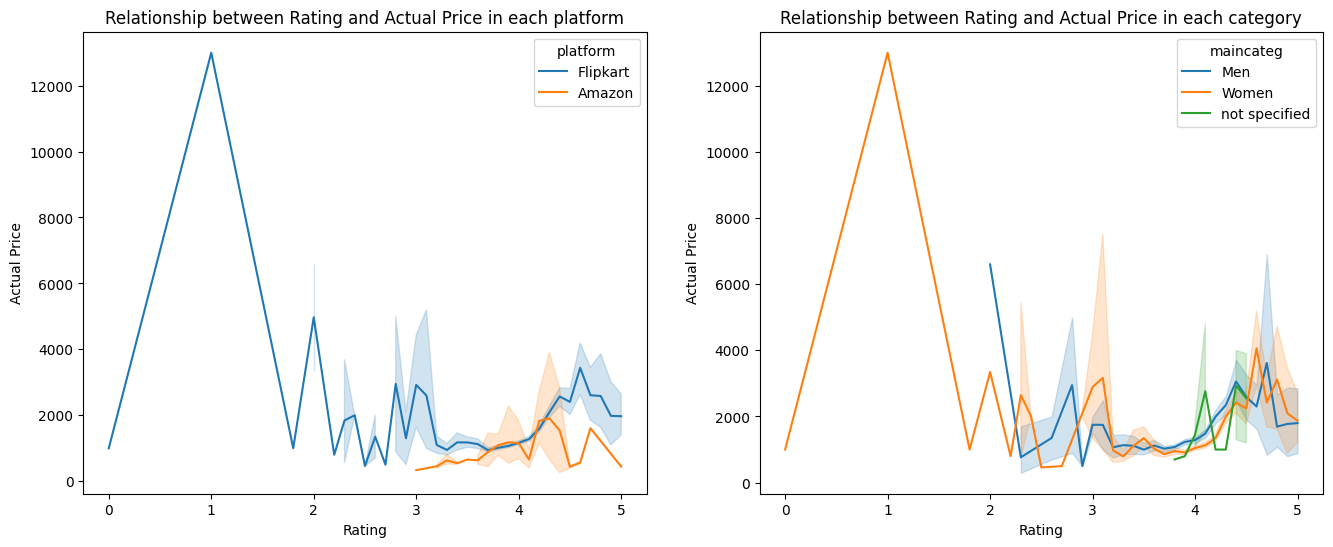

In [43]:
# Relationship between Rating and Actual Price in each platform
fig,axes=plt.subplots(1,2,figsize=(16,6))
sns.lineplot(x='Rating',y='act_price',data=ecom,hue='platform',ax=axes[0])
axes[0].set_title('Relationship between Rating and Actual Price in each platform')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Actual Price')
# Relationship between Rating and Actual Price in each category
sns.lineplot(x='Rating',y='act_price',data=ecom,hue='maincateg',ax=axes[1])
axes[1].set_title('Relationship between Rating and Actual Price in each category')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Actual Price')

1. The shades area denotes that actual price varies for each rating.
2. In this both graph, the fluctuations between rating and actual prices are clearly visible according to platform and main category too.
3. There are lot of fluctuations between 2-5 ratings and 0-4000 price.

#Average of ratings and actual price according to fulfilled:-

<ipython-input-44-9718e2321abd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ecom,x='fulfilled',y='Rating',ax=axes[0],palette=['purple'])
<ipython-input-44-9718e2321abd>:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ecom,x='fulfilled',y='Rating',ax=axes[0],palette=['purple'])


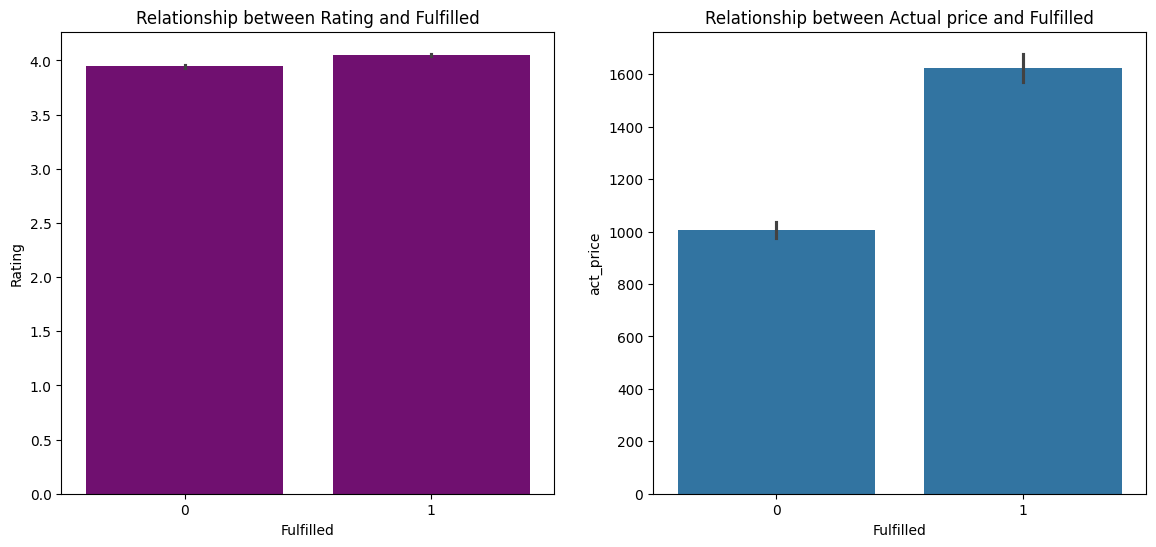

In [44]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
#Graph1
sns.barplot(data=ecom,x='fulfilled',y='Rating',ax=axes[0],palette=['purple'])
axes[0].set_title('Relationship between Rating and Fulfilled')
axes[0].set_xlabel('Fulfilled')
axes[0].set_ylabel('Rating')
#Graph2
sns.barplot(data=ecom,x='fulfilled',y='act_price',ax=axes[1])
axes[1].set_title('Relationship between Actual price and Fulfilled')
axes[1].set_xlabel('Fulfilled')
axes[1].set_label('Actual Price')

#GRAPH 1:-
1. Due to the third party interruption the delivery timing, refund stuffs, quality of products may varies.
2. So people might've been disappointed with that that's why ratings of third party involvement for logistics(fulfilled 0) is little bit lesser than fulfilled 1
#GRAPH 2:-
1. When third party logistics company enters in between them people will gain trust issues.
2. So people won't buy costly products with trust. They will go for straight sellers or platform's services only

In [45]:
pd.pivot_table(data=ecom,values=['Rating','act_price'],aggfunc='mean',index='fulfilled')

,Rating,act_price
fulfilled,,
0,3.947011,1005.017840
1,4.052303,1623.115142


In [46]:
ecom[ecom['Rating']==5].count()
ecom[ecom['Rating']==4.7].count()

,0
id,37
pname,37
maincateg,37
platform,37
act_price,37
Rating,37
overall_rating,37
no_rating,37
no_review,37
avg_rate_count,37


In [51]:
ecom

,id,pname,maincateg,platform,act_price,Rating,overall_rating,no_rating,no_review,avg_rate_count,good_rate_count,bad_rate_count,fulfilled
0,2242,Casuals For Men (Blue),Men,Flipkart,999,3.8,good,27928,3543,3457,18533,5938,1
1,20532,Women Black Flats Sandal,Women,Flipkart,499,3.9,good,3015,404,397,2115,503,1
2,10648,Women Gold Wedges Sandal,Women,Flipkart,999,3.9,good,449,52,71,299,79,1
3,20677,Men's Height Increasing High Heel Formal Party...,Men,Flipkart,2999,3.9,good,290,40,49,192,49,1
4,12593,Loafers For Men (Tan),Men,Flipkart,999,3.9,good,2423,326,293,1679,451,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,14033,Women Off White Flats Sandal,Women,Flipkart,699,4.0,good,1235,153,155,1880,332,1
5240,297,Slip On For Men (Tan),Men,Flipkart,1993,3.9,good,329,56,60,387,42,0
5241,18733,Women Grey Heels Sandal,Women,Flipkart,999,3.8,good,1280,135,172,864,244,0
5242,6162,Womens Casual Comfort Stylish Black High Heel ...,Women,Flipkart,499,3.9,good,4867,574,648,3358,861,0


 #CONCLUSION:-
 **People who purchased products through direct platform had satisfied many because of their proper customer services**
 **Due to thirty party logistics interruption thy are not satisfied with the customer services so that affect the roducts ratings severely.**
 **Big platforms like Amazon and Flipkart shouldn't get bad reputations due to this reason even though their products when in a good quality. They should take care of it.**
 **And also some costly products in very few numbers got ratings below 2 ratings. If these happens continuosuly people won't believe to buycostly products here after. They should provide proper quality of products irrespetive of the cost.**